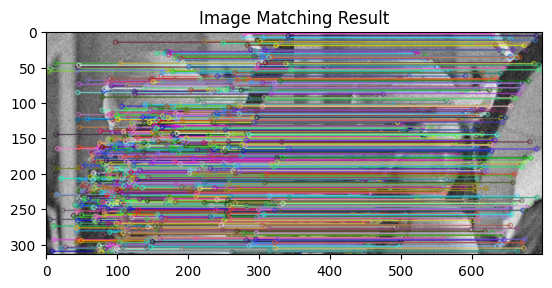

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load two example images (replace with your own image paths)
image1 = cv2.imread('Picture1.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('Picture2.png', cv2.IMREAD_GRAYSCALE)
# Create SIFT detector
sift = cv2.SIFT_create()
# Detect keypoints and compute descriptors for both images
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)
# Create a Brute-Force Matcher  
bf = cv2.BFMatcher()
# Match descriptors between the two images
matches = bf.knnMatch(descriptors1, descriptors2, k=2)
# Apply ratio test to obtain good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.5 * n.distance:
        good_matches.append(m)
# Draw matches on a new image
matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None,
flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
# Display the matched image
plt.imshow(matched_image), plt.title('Image Matching Result')
plt.show()